# Black box model - Tree ensemble - (Dataset Iris)

## Random Forest, a tree ensemble using the Bagging technique + random feature split

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

In [109]:
iris = load_iris()

In [110]:
X = iris.data
y = iris.target

In [111]:
iris['feature_names'] # 4 features only

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [112]:
df = pd.DataFrame(X,columns=iris['feature_names'])
df_features = df.copy()

In [113]:
df_features.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [114]:
df['Iris-class'] = y

# Iris Dataset

In [115]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris-class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [116]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [117]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris-class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Iris-class         150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


# Exploratory Data Analysis

In [119]:
# Correlation
corr = df.corr()
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris-class
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
Iris-class,0.782561,-0.426658,0.949035,0.956547,1.000000


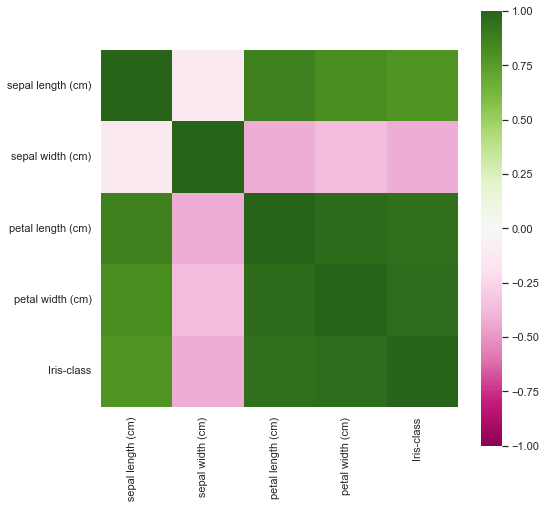

In [120]:
# Plot correlation heatmap

# Plot these values on heatmap

sns.set(style = 'whitegrid')
sns.set_palette('bright')

f,ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr,
            vmin=-1, vmax=1, center=0,
            cmap='PiYG',
            square=True,
            ax=ax)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right');

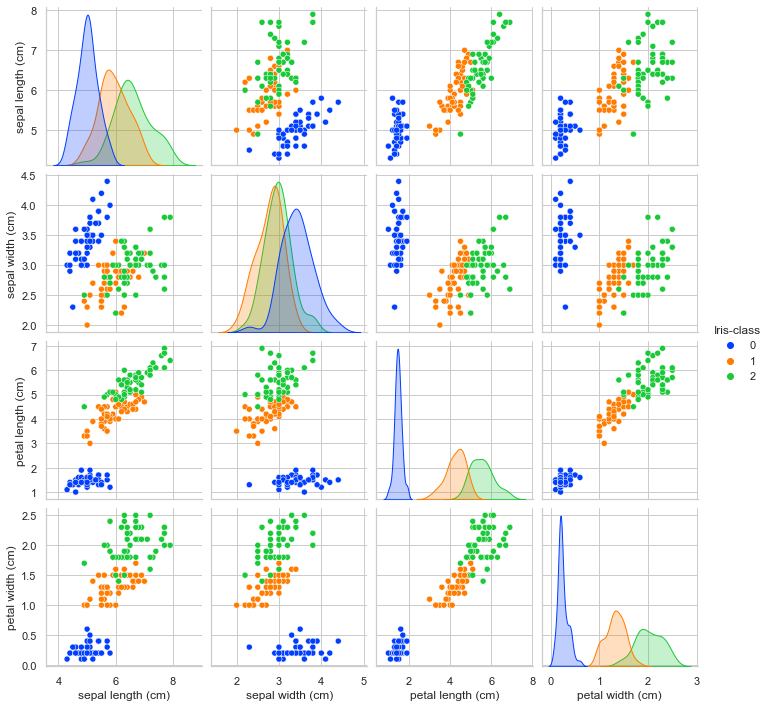

In [121]:
sns.pairplot(df,hue='Iris-class',palette='bright')
plt.show()

# Pre-processing

In [122]:
# Iris data & class are already encoded.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Modelling

In [123]:
# Import
from sklearn.ensemble import RandomForestClassifier

def create_rf_model(n_estimators,
                    max_depth=10,
                    criterion='gini',
                    random_state=42):

    return RandomForestClassifier(n_estimators=n_estimators,
                         max_depth=max_depth,
                         criterion=criterion,
                         random_state=random_state)

# Above function can be used if need to create different rf models. e.g. 3 target variables - grades in
# read, write, math but input feature are same.



### Training individual trees on random subsets of data and a random subset of features to split on.
### Call the helper rf function

In [124]:
# Instantiate
rf_model = create_rf_model(25)

# Fit
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)

# Performance Metric

In [125]:
# Accuracy, Precision, Recall and F1 score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'macro')
recall = recall_score(y_test, y_pred, average = 'macro')
f1 = f1_score(y_test, y_pred, average = 'macro')
#
print("acc", acc)
print("precision", precision)
print("recall", recall)
print("f1", f1)


acc 1.0
precision 1.0
recall 1.0
f1 1.0


# Black Box - Feature Importance

### We look at global relative importance of each feature by averaging the normalized feature
### importance across all decision trees.

In [126]:
fi = rf_model.feature_importances_

In [127]:
fi

array([0.09779488, 0.0266394 , 0.42868406, 0.44688166])

In [128]:
feature_names = iris['feature_names']

In [129]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

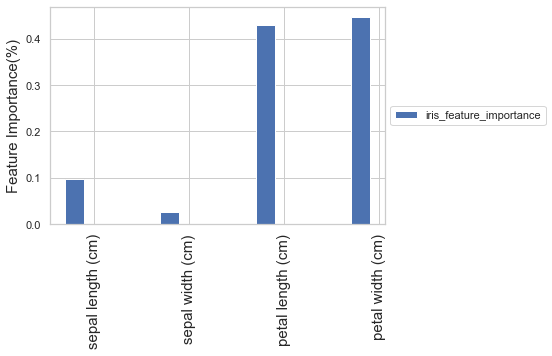

In [130]:
# Code to plot relative feature importance

fig, ax = plt.subplots()
index = np.arange(len(feature_names))
bar_width = 0.2
opacity = 1
error_config = {'ecolor' : '0.3'}
ax.bar(index, fi, bar_width, alpha=opacity, color='b', label='iris_feature_importance')
ax.set_xlabel('')
ax.set_ylabel('Feature Importance(%)', fontsize=15)
ax.set_xticks(index + bar_width)
ax.set_xticklabels(feature_names, fontsize=15)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.grid(True);

# Black Box - PDP plots
### PDP as expected target response as a function of input features of interest.


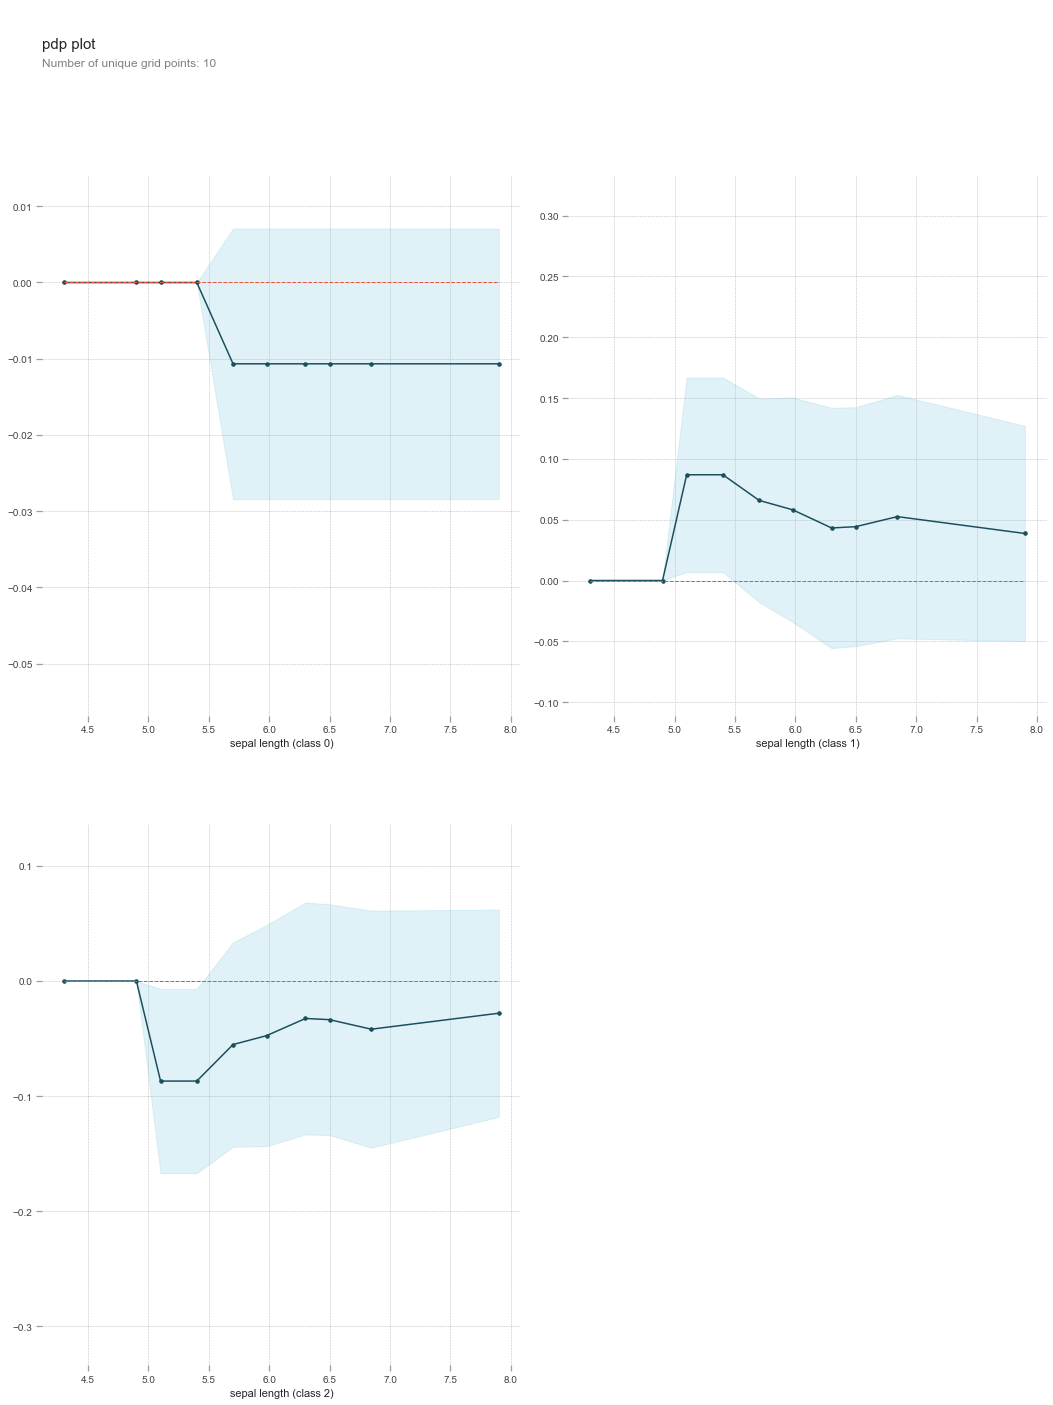

In [131]:
from pdpbox import pdp

pdp_sepal_length = pdp.pdp_isolate(model=rf_model,
                                   dataset=df,
                                   model_features=feature_names,
                                   feature='sepal length (cm)')

plot_params = {'title' : 'pdp plot'}

fig, axes = pdp.pdp_plot(pdp_isolate_out=pdp_sepal_length,
                         feature_name='sepal length',
                         plot_params=plot_params,
                         figsize=(18,25))


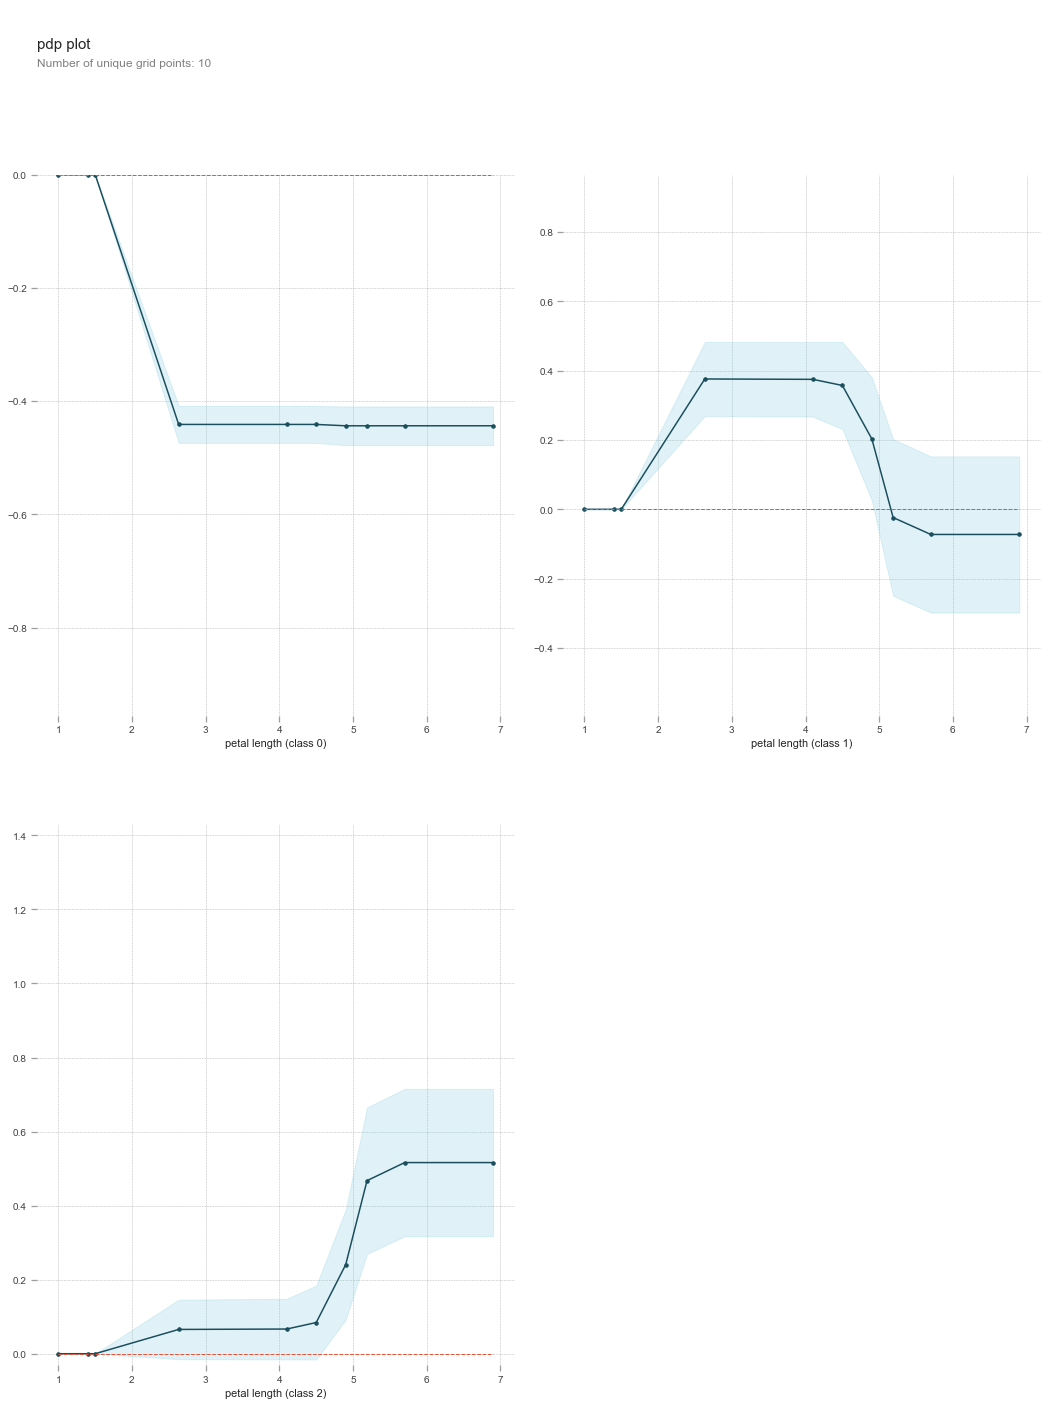

In [132]:
pdp_petal_length = pdp.pdp_isolate(model=rf_model,
                                   dataset=df,
                                   model_features=feature_names,
                                   feature='petal length (cm)')

plot_params = {'title' : 'pdp plot'}

fig, axes = pdp.pdp_plot(pdp_isolate_out=pdp_petal_length,
                         feature_name='petal length',
                         plot_params=plot_params,
                         figsize=(18,25))